### Springboard Data Science - Capstone 3

#### Sentiment Analysis - Exploratory Data Analysis

In [1]:
import pandas as pd

path = "C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\hotels_post_datawrangling.csv"

hotels = pd.read_csv(path)

In [2]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
Hotel_Address                                 515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null float64
days_since_review                             515738 non-null object
lat                                           512470 non-null float64
lng                                           512470 non-null float64
Month                                         515738 non-nu

In [3]:
hotels.head(3)

,Hotel_Address,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Total_Number_of_Reviews,Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Month,Year,Day,country,Trip_type,Group_type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,1403,Only the park outside of the hotel was beauti...,7,2.9,0 days,52.360576,4.915968,8,2017,3,Netherlands,1.0,2
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Ireland,No Negative,1403,No real complaints the hotel was great great ...,7,7.5,0 days,52.360576,4.915968,8,2017,3,Netherlands,1.0,2
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,1403,Location was good and staff were ok It is cut...,9,7.1,3 days,52.360576,4.915968,7,2017,31,Netherlands,1.0,4


In [4]:
len(hotels.Hotel_Name.value_counts())

1492

Which were the hotels with the most and least reviews

<AxesSubplot:>

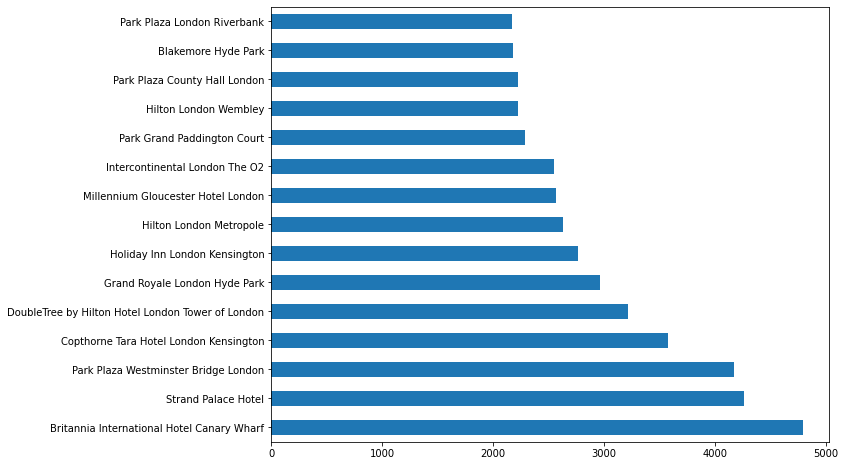

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

top_15_hotel = hotels.Hotel_Name.value_counts(ascending=False)[:15]
bottom_15_hotel = hotels.Hotel_Name.value_counts(ascending=True)[:15]

top_15_hotel.plot.barh(figsize = (10,8))



<AxesSubplot:>

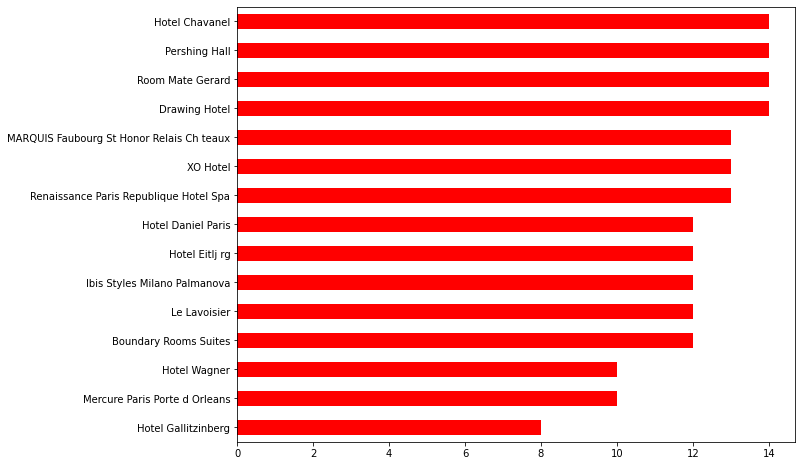

In [6]:
bottom_15_hotel.plot.barh(figsize = (10,8), color = 'red')


Q) What was the Average Score of a Reviewer? We can be curious about this to find the credibility of the reviewer.

df.astype(int) will round our values to zero. so for example, 2.9 will be 2, and 2.3 will be 2. Hence, df.round(0).astype(int) fixes that issue for us. 2.9 will round to 3, and 2.3 will round to 2

In [7]:
means = hotels['Reviewer_Score'].mean()

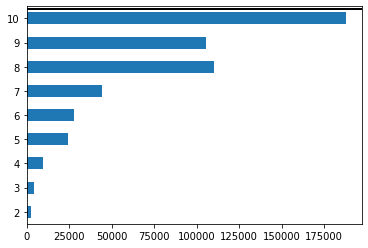

In [8]:
hotels['Review_score_int'] = hotels['Reviewer_Score'].round(0).astype(int)

Reviewer_order = hotels['Review_score_int'].value_counts().sort_index()
Reviewer_order.plot.barh()
plt.axhline(y = means, color = 'black', lw = 2)


# Adding a horizontal line to show mean.

Almost 375k+ reviews came from reviewer with a score 8 or more, meaning that we have a lot of credible reviewers. 

We might be curious on the reviews based on the reviewer nationality. Now since during data wrangling we saw that we have more than 150+ nationalities, we can filter out nationalities based on the amount of reviews, we can set a threshold, say if a nationality gave more than 5000 reviews, we want to see the average score for it.

In [9]:
Nationality_pivot = hotels.pivot_table(values = "Reviewer_Score", index = "Reviewer_Nationality", aggfunc=["count","mean"])
# Nationality_pivot

Nationality_pivot.columns = ['Count', 'reviews_mean']
Nationality_pivot

,Count,reviews_mean
Reviewer_Nationality,,
,523,8.008222
Abkhazia Georgia,153,8.354248
Afghanistan,8,6.875000
Albania,286,8.250350
Algeria,100,7.777000
...,...,...
Vietnam,187,8.083957
Wallis and Futuna,2,7.300000
Yemen,16,8.112500


In [10]:
Nationality_pivot[Nationality_pivot['Count']>5000].sort_values(by = 'reviews_mean', ascending=False)

,Count,reviews_mean
Reviewer_Nationality,,
United States of America,35437,8.786999
Israel,6610,8.694448
Australia,21686,8.591718
Canada,7894,8.547783
United Kingdom,245246,8.486352
Ireland,14827,8.464052
Belgium,6031,8.174067
Switzerland,8678,8.161593
France,7296,8.145011


Text(0.5, 1.0, 'Review Count by Country')

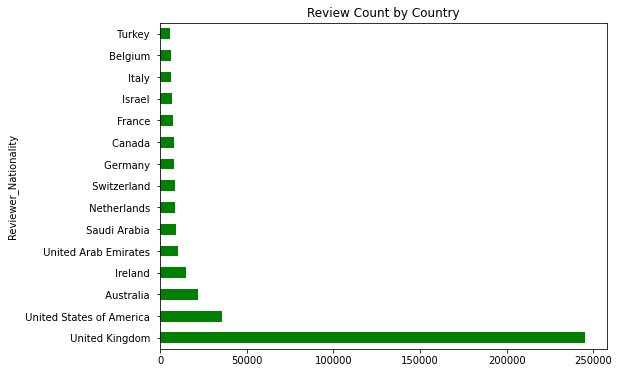

In [11]:
only_reviews = Nationality_pivot[Nationality_pivot['Count']>5000]['Count'].sort_values(ascending=False)
only_reviews.plot.barh(color = 'green', figsize = (8,6))
plt.title('Review Count by Country')

The lowest average given that the nation had 5000 or more reviews came from countries that did not have English as their first language. English speaking countries not only had the most reviews, but 4 out of 5 countries that have the highest review score were also English speaking countries.

<AxesSubplot:>

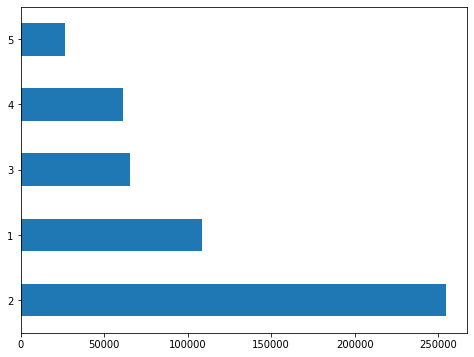

In [12]:
hotels['Group_type'].value_counts().plot.barh(figsize= (8,6))

#IGNORE

Only 100k+ reviews came from person who went to vacation solo. The rest of the reviews came from people with a group of 2 or more, whether a couple, group, or families.

Text(0.5, 1.0, 'Average Score by Country')

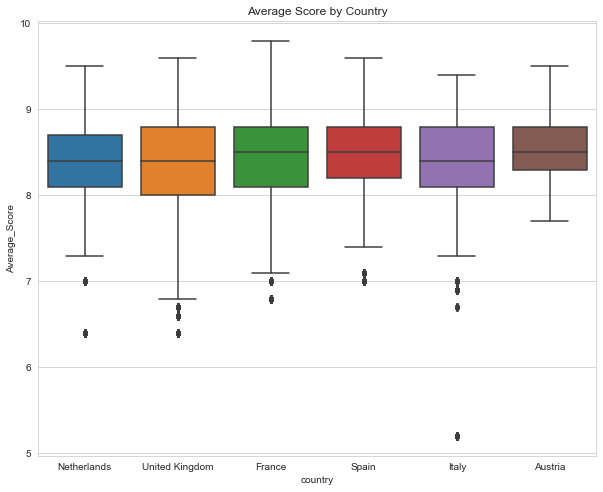

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'country', y='Average_Score', data = hotels)
plt.title('Average Score by Country')

The score distribution between countries have a little to no difference in the mean aspect of scores. Besides, we see that French, Spanish, and Austrian hotels have the same scores, just a little above than the rest. 

Which Country put of the 6 had the most number of hotels? Remember UK hotel reviews account for 50% of the data, howver let us see which country has the most amount of hotels.

In [14]:
hotels.groupby('country')[['Hotel_Name']].nunique().sort_values(by = 'Hotel_Name', ascending = False).reset_index().style.bar(color='pink')

,country,Hotel_Name
0,France,458
1,United Kingdom,400
2,Spain,211
3,Italy,162
4,Austria,158
5,Netherlands,105


United Kingdom has 400 hotels but account for more than 50% of the reviews, French has the most number of hotels yet only account for 60k reviews as was discovered in the Data Wrangling notebook.

In [15]:
hotels['Date'] = pd.to_datetime(hotels[['Year', 'Month']].assign(DAY=1))

# hotels.drop(columns=['Month', 'Year', 'Day', 'lat', 'lng', 'days_since_review'], inplace = True)
hotels.head()

,Hotel_Address,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Total_Number_of_Reviews,Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Month,Year,Day,country,Trip_type,Group_type,Review_score_int,Date
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,1403,Only the park outside of the hotel was beauti...,7,2.9,0 days,52.360576,4.915968,8,2017,3,Netherlands,1.0,2,3,2017-08-01
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Ireland,No Negative,1403,No real complaints the hotel was great great ...,7,7.5,0 days,52.360576,4.915968,8,2017,3,Netherlands,1.0,2,8,2017-08-01
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,1403,Location was good and staff were ok It is cut...,9,7.1,3 days,52.360576,4.915968,7,2017,31,Netherlands,1.0,4,7,2017-07-01
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,1403,Great location in nice surroundings the bar a...,1,3.8,3 days,52.360576,4.915968,7,2017,31,Netherlands,1.0,1,4,2017-07-01
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,1403,Amazing location and building Romantic setting,3,6.7,10 days,52.360576,4.915968,7,2017,24,Netherlands,1.0,2,7,2017-07-01


<AxesSubplot:xlabel='Date'>

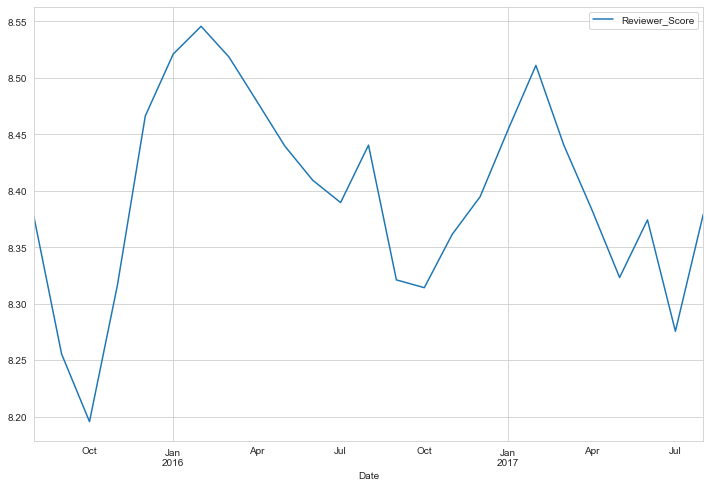

In [16]:
hotels[["Date","Reviewer_Score"]].groupby("Date").mean().plot(figsize=(12,8))

The difference in scores is not significant, however during summer time, the scores seem to show a downtrend. This can come from the reason that people travel more during the summer time, and hotels might not be able to provide the service that they would if it was not overcrowded. 

Wall time: 524 ms


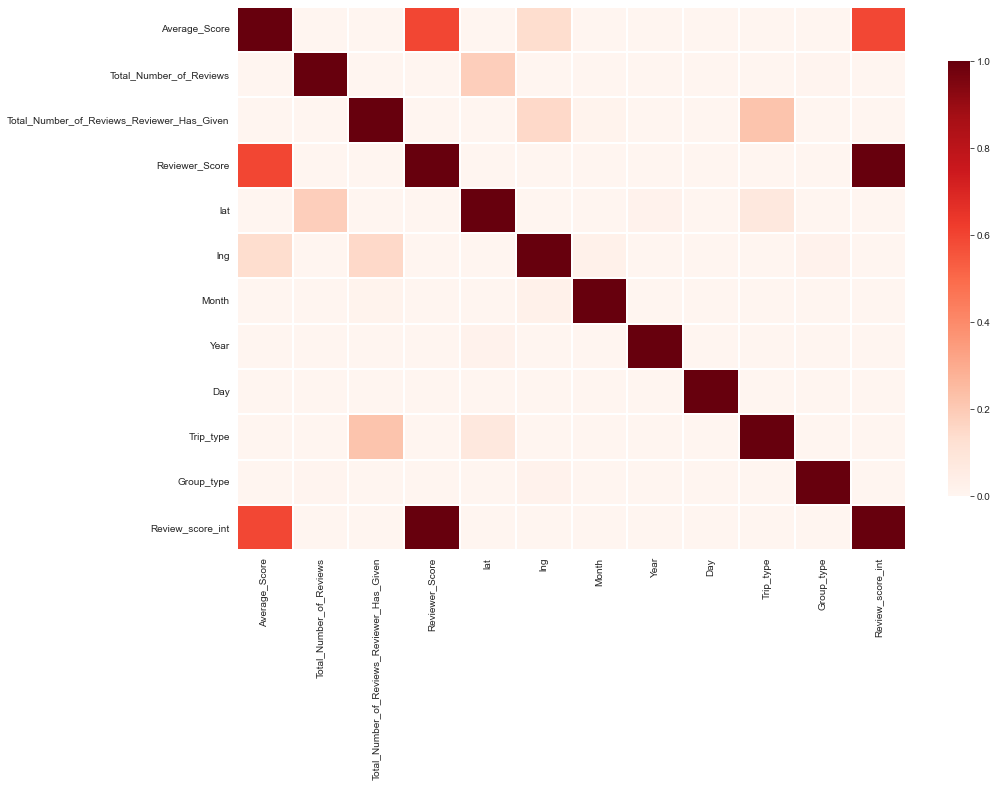

In [17]:
%%time

orig_corr = hotels.corr()
plt.figure(figsize=(15,10))
_ = sns.heatmap(orig_corr.corr(), cmap = 'Reds', vmin = 0.0, vmax = 1, linewidth=0.3, cbar_kws={"shrink": .8})



In [18]:
import sys
print(sys.executable)

C:\Users\hanna\AppData\Local\Programs\Python\Python38-32\python.exe


In [19]:
# pip install WordCloud

In [20]:
# pip install nltk

In [21]:
import nltk
nltk.download()
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [22]:
stopwords = nltk.corpus.stopwords.words('english')

In [23]:
from wordcloud import WordCloud

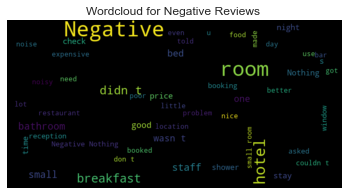

<Figure size 1440x720 with 0 Axes>

Wall time: 1h 8min 40s


In [26]:
%%time
neg_reviews = ""
for i in range(hotels.shape[0]):
    neg_reviews = " ".join([neg_reviews,hotels["Negative_Review"].values[i]])
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black', width=800, height=400, max_words = 50, max_font_size=50).generate(neg_reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud for Negative Reviews ")
plt.axis("off")
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.show()


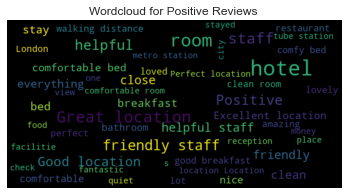

<Figure size 1440x720 with 0 Axes>

Wall time: 1h 3min 36s


In [27]:
%%time
pos_reviews = ""
for i in range(hotels.shape[0]):
    pos_reviews = " ".join([pos_reviews,hotels["Positive_Review"].values[i]])
        
wordcloud = WordCloud(background_color='black', width=800, height=400, max_words = 50, max_font_size=50).generate(pos_reviews)
wordcloud.recolor(random_state=312)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud for Positive Reviews ")
plt.axis("off")
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.show()
